In [1]:
import pandas as pd 

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
# To extract the first 5 entries in our data
# housing.head()

In [4]:
# Information about the number of entries, names of the columns and their corresponding datatypes. 
# housing.info()

In [5]:
# Accessing the column with name 'CHAS'
# housing['CHAS']

# To get the frequency of each element in a particular column.
# housing['CHAS'].value_counts()

In [6]:
# Statistical information such as mean, max, min, count, standard deviation, etc for all the columns.
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
# bins is the number of bars (number of equal width bins)
# housing.hist(bins = 50, figsize = (20, 15))

# To assess the accuracy of our model, we used a train-test split.

## We'll try to divide our data into two parts at random (80 : 20 ratio is often considered ideal). That means that 80% of our data will be used to train the data, while 20% will be used to test it.

## This is done so that we can assess our model on a 20% scale, verify its accuracy, and calculate the error.

## If we feed all of the data into our model to test it, it's possible that our model overfits the input dataset but is very inaccurate with the unseen data, and we'll never know. As a result, we will assess its correctness on a 20 percent scale.

In [10]:
# import numpy as np
# random.permutation() will generate a new permutation every time it is run. This way our data will be exposed to
# the unseen data which we do not want, this is why will use random.seed(42) 
# (seed could be any constant) to fix our permmutation

# The same function is available in the sklearn module.

def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

# Stratified Sampling

## If we have a feature that can only take a few values (let's say 0 or 1), it's possible that when we do the train test splitting on our data, all of the features with a value of 0 end up in the test data, and our model never learns if the value of that feature can also be 1. If this feature is critical, it could result in a model that is extremely inaccurate.

## We use stratified sampling to avoid this kind of splitting.

In [13]:
# Using stratified sampling on the column 'CHAS'
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Looking for correlations

In [14]:
# By running these two and comparing the ratios of all the possible values that our column (here, 'CHAS') could take 
# (here, 0 or 1) in our stratified test and train set, we find that the ratios are almost identical because of stratified sampling.
# strat_test_set['CHAS'].value_counts()
# strat_train_set['CHAS'].value_counts()

In [15]:
housing = strat_train_set.copy()

In [16]:
# A square matrix of dimensions (columns x columns) where the cell with index x, y denotes the relative change in 
# column[x] with respect to changes in column[y]. 

# The correlation matrix is calculated such that that relative changes is compressed between -1 to 1 inclusive.
# A negative value in the cell denotes the decrease in one feature corresponding to increase in another.

# It should be noted that the value of the cell x, y is the same as the cell y, x.

# correlation_matrix = housing.corr()

# correlation_matrix

In [17]:
# Accessing the correlation values of all the features corresponding to the label ('MEDV' in this case which is equivalent to price)

# This type of data is very useful in predicting the price because it helps in determining the attributes that strongly affects our label.

# correlation_matrix['MEDV'].sort_values(ascending = False)

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

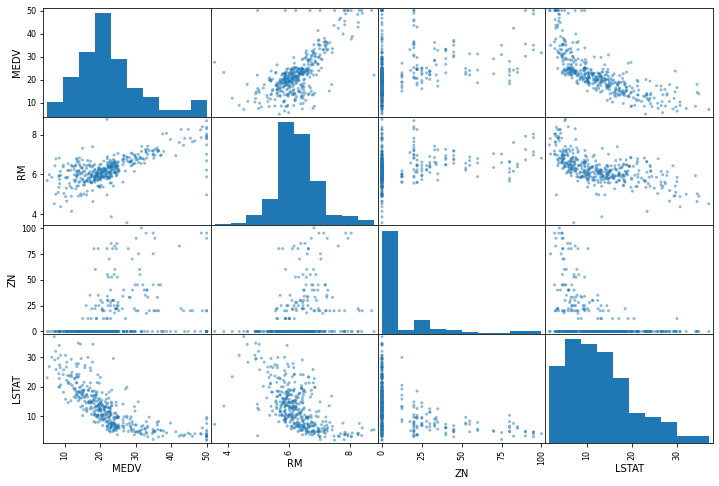

In [18]:
# The total of 16 graphs are displayed with 4 histogram plot corresponding to the same features because the graph anyway 
# would be a straight line only. But our model plots the histogram corresponding to the graphs with same features on 
# both the axes. 

# From these graphs the above calculated correlation values can be easily visualised.

from pandas.plotting import scatter_matrix
attributes_to_plot = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes_to_plot], figsize = (12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

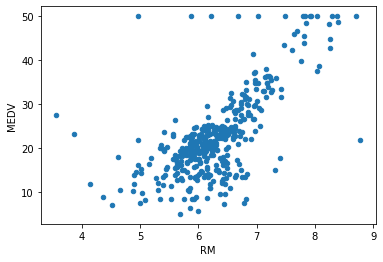

In [19]:
# The value of the alpha can be increased if we want our graph to be more densed. 

# The motive behind plotting of these correlations is that we can eliminate the outliers from our data.
# From the plot below we would find that there are some data that are very less in numbers but are scattered far away
# from the densed are. These points are called as outliers and can make our model inaccurate. So if a particular feature is 
# very important we can eliminate these points or outliers.

# Other parameters for kind is line, bar, pie, etc.

housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 1)

# Combining attributes and observing its correlation with our label

In [20]:
# We can combine two or more attributes together to create a new attribute. 
# In this we will combine the TAX and Room attribute to create a new attribute tax per room (TAXRM)

# A new column will be created ('TAXRM')# We can combine two or more attributes together to create a new attribute. 
# In this we will combine the TAX and Room attribute to create a new attribute tax per room (TAXRM)

# A new column will be created ('TAXRM')

# housing['TAXRM'] = housing['TAX'] / housing['RM']

<AxesSubplot:xlabel='TAX', ylabel='MEDV'>

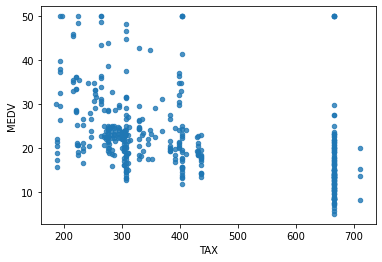

In [21]:
# Creating the correlation matrix again to see the relation of our newly created attribute to the price ('MEDV')

correlation_matrix = housing.corr()

# We found that our newly created attribute TAXRM (tax per room) shows a strong negative coorelation with our price
# which is very useful for us. As attributes that show strong positive or negative correlation with our label
# are very critical and it will help us to remove the outliers from our dataset.

correlation_matrix['MEDV'].sort_values(ascending = False)

# Observing the outliers through the scatter plot and planning to remove it.

housing.plot(kind = 'scatter', x = 'TAX', y = 'MEDV', alpha = 0.8)

In [22]:
housing = strat_train_set.drop('MEDV', axis = 1)
housing_labels = strat_train_set['MEDV'].copy()

# Missing Attributes

In [23]:
# It is possible that some of the values of a particular or more attributes go missing.
# We can deal with this situations in one of the following ways:
# 1. Getting rid of the whole row of that data. (not preferred if you already have less data points)
# 2. Getting rid of that particular attribute completely. (not preferred if the attribute shows significant correlation with the label)
# 3. Setting the missing point a value (0, median or mean) (ideal and mostly preferred way)

In [24]:
# Solving the issue with method 1 :

# If we pass the parameter inplace = TRUE then our housing will be affected. 
# new_housing is just a copy of the modified housing data. 
# housing is not modified.

new_housing = housing.dropna(subset = ['RM'])

# We observed that the shape of the data changed from 404 x 13 to 399 x 13 because there were 5 NULL values in the 
# 'RM' column.

new_housing.shape

(399, 13)

In [25]:
# Solving the issue with method 2 :

# In pandas axis 0 corresponds to the rows and axis 1 corresponds to the columns. Since we have not passed inplace 
# = True, our housing is not modified

housing.drop('RM', axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [26]:
# Solving the issue with method 3 :

# Calculating the median using the median() method

median = housing['RM'].median()

# Filling all the missing points with the median

housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [27]:
# For the method 3, we can do it easily for multiple attributes using a class in sklearn named imputer.

# Other parameters for strategy are mean and mode. (mean is default)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

# Fitting the imputer in housing data
imputer.fit(housing)

SimpleImputer(strategy='median')

In [28]:
# It calculated the median for all of the 13 columns. 

imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [29]:
# The return type of transform in SimpleImputer is numpy array.
housing_imputer_transformed = imputer.transform(housing)

# print(type(housing_imputer_transformed))

In [30]:
housing_transformed = pd.DataFrame(housing_imputer_transformed, columns = housing.columns)

In [31]:
# 404 entries in the 'RM' column that means it fitted the median value at the NULL places for all the attributes.
housing_transformed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

# Creating a Pipeline

There are primarily three types of objects :

1. Estimators : Estimates some parameter based on the dataset like imputer.
Imputer has fit and transform methods.
Fit Method : It fits the dataset and calculates the internal parameters.


2. Transformers : It takes input and returns output based on the learnings from fit().
It also has a convenience function called fit_transform() which does the same work as fit and then transform and is 
comparatively fast.


3. Predictors : Linear Regression Model, KNN. fit() and predict() are two common functions. It also gives score() functions which will evaluate predictions.

Note : Predictors always take numpy array as input.

# There are primaily two types of feature scaling.

1. Min-max scaling (Normalization)
   
    Scaling is done as (value - min) / (max - min) (It is observable that the range is from 0 to 1 inclusive)
    
    For this sklearn provides a class called MinMaxScaler.


2. Standardization

    Scaling is done as (value - min) / std (standard deviation)
    
    For this sklearn provides a class called StandardScaler.


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
#         Since we had explicitly used the imputer with strategy as median, so we need not do it here.
#         But it is a good practice to use it this way.
#         ('imputer', SimpleImputer(strategy = 'median')),
        ('std_scaler', StandardScaler()),
    ])

In [33]:
# The return type of fit in Pipeline is numpy array and we will leave it as it is because Predictors take input parameter as numpy array.
# This housing_transformed is our original dataset housing with SimpleImputer fitted the values at the NULL position with strategy median.
# housing_transformed here is dataframe.Evaluating the performance of the chosen model

housing_data_from_pipeline_as_numpy_array = my_pipeline.fit_transform(housing_transformed)

In [34]:
housing_data_from_pipeline_as_numpy_array.shape

(404, 13)

# Selection of a desired model for our real estate

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model = LinearRegression()
# model = DecisionTreeRegressor()

model.fit(housing_data_from_pipeline_as_numpy_array, housing_labels)

RandomForestRegressor()

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data_from_pipeline = my_pipeline.fit_transform(some_data)
model.predict(prepared_data_from_pipeline)

array([20.298, 32.138,  9.768, 20.831, 21.693])

In [37]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the performance of the chosen model

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = model.predict(housing_data_from_pipeline_as_numpy_array)

# Mean Squared Error
mse = mean_squared_error(housing_labels, housing_predictions)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# In case of Linear Regression the mean squared error was 23.38 while in case of Decision Tree Regressor it was 0.0.
# This might lead us to think that the Decision Tree Regressor model is ideal for our model. It could be true but most 
# of the time it happens that some of our model overfits the dataset. This means that our model learns the noise from 
# our dataset which we do not want. We want to build a model that could learn the trend from the dataset.

print(mse)

1.456597470297028


# A better evaluation technique - Cross Validation

In [39]:
# Using this is a better metric to chose a particular model over another. After analysing the root mean squared scores 
# of both the model. Decision Tree Regressor performed better than the Linear Regression.

# We used simple 10 folds since cv = 10. In this our data was divided into 10 equal parts randomly and in ten iterations
# it calculates the scores corresponding to it.

# Since this is a minimization problem and since cost function requires utility and we know in utility greater is better, 
# so we used the scoring as negative of mean squared error. 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_data_from_pipeline_as_numpy_array, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [40]:
print(scores)
print(rmse_scores)

[ -8.51332807  -6.905554   -19.22487746  -7.38616837 -11.09118905
  -7.84811095 -21.66080582 -10.67977747 -11.28676843 -10.17320095]
[2.9177608  2.62784208 4.38461828 2.71775061 3.33034368 2.80144801
 4.65411708 3.26799288 3.35957861 3.18954557]


In [41]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

In [42]:
print_scores(rmse_scores)

Scores :  [2.9177608  2.62784208 4.38461828 2.71775061 3.33034368 2.80144801
 4.65411708 3.26799288 3.35957861 3.18954557]
Mean :  3.325099760359072
Standard Deviation :  0.6486059214992909


## Saving the model

In [43]:
from joblib import dump, load
dump(model, 'Real Estate Predictor.joblib')

['Real Estate Predictor.joblib']

## Testing the model on stratified test data

In [44]:
# Now our model is launched. We will check its correctness using our stratified set which we had segregated earlier.

x_test = strat_test_set.drop('MEDV', axis = 1)
y_test = strat_test_set['MEDV'].copy()

x_test_prepared = my_pipeline.fit_transform(x_test)

final_predictions = model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

final_rmse

3.4199117535341137